# Aeropolis：
Primary aim is the prediction of cargo capacity for the delivery drones using numerous factors from the Aeropolis dataset.

# Data Loading and Initial Inspection

We first loaded the dataset and inspected its structure and content, and then reviewed basic statistics and identified missing values to prepare for further analysis.

In [119]:
import pandas as pd #data handling
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
data = pd.read_csv('/Users/dongziyi/Desktop/aeropolis.csv') #path

import warnings
warnings.filterwarnings("ignore")

#here, we just wanna display info on the csv dataset
print("First 5 rows of the dataset:")#we can remove it later 
print(data.head())

print("Dataset info:")
print(data.info())#column names, data types, non null counts

print("Summary statistics:")
print(data.describe())# summary of numerical columns

print("Missing values:")
print(data.isnull().sum())#counts missing values in each column

First 5 rows of the dataset:
   Cargo_Capacity_kg  Air_Temperature_Celsius Weather_Status Package_Type  \
0           4.270384                32.241410         Cloudy        Maize   
1           5.120852                24.635445          Sunny       Cotton   
2           2.976017                16.292566         Cloudy       Barley   
3           4.990381                      NaN          Sunny      Soybean   
4           2.938318                21.689674            NaN      Soybean   

  Vertical_Landing  Equipment_Cost  Market_Region Flight_Duration_Minutes  \
0        Supported        36563.84          Local                   False   
1        Supported        29156.29          Local                   False   
2          Unknown        10909.55  International                   False   
3              NaN        48315.38  International                    True   
4          Unknown        49506.24          Local                   False   

  Terrain_Type  Water_Usage_liters  Flight_Ho

Here we used a heatmap to quickly identify missing values in the dataset for easier cleaning.

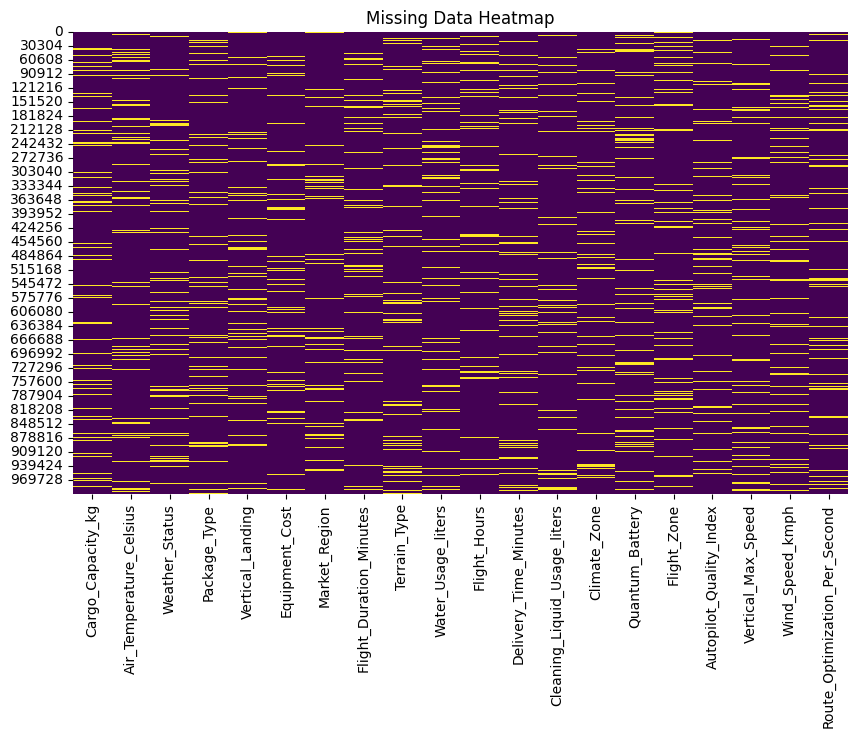

In [101]:
#Visualization of missing data
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap = 'viridis')
plt.title("Missing Data Heatmap")
plt.show()

# EDA (Explanatory Data Analysis)
Analysis of the dataset to find and understand patterns, distributions and correlations. Visualizations help to identify outliers, general trends and relashionships between feautures and target variable

### Target Variable Distribution
A histogram with a density curve was used to visualize the distribution of Cargo_Capacity_kg, providing insights into its spread and shape.


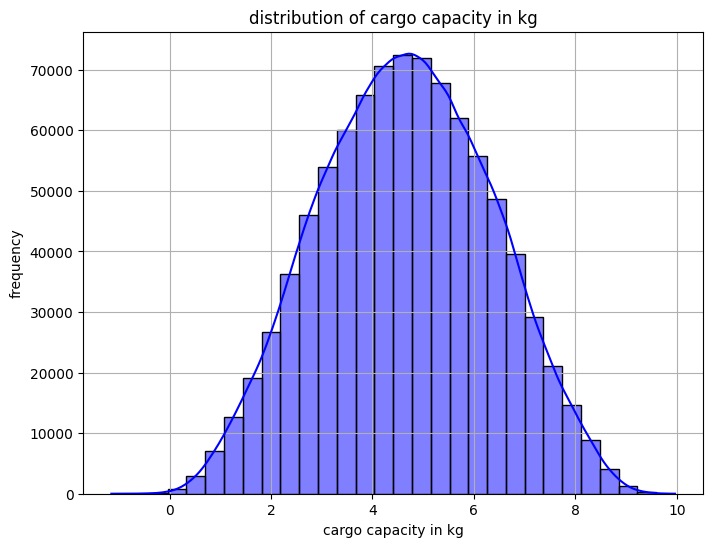

In [102]:
#eda code (with visualizations, without missing data handling)
#visualization 
#cargo capacity analysis (target variable distribution)
plt.figure(figsize=(8,6))
sns.histplot(data['Cargo_Capacity_kg'],kde=True, bins=30, color='blue')#histogram with density curve
plt.title("distribution of cargo capacity in kg")
plt.xlabel("cargo capacity in kg")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

The histogram of Cargo_Capacity_kg shows that the target variable is approximately normally distributed, with some skewness on the left/right side. This suggests that most drones have a moderate cargo capacity, but a few can carry significantly more/less.


### Numerical Feature Analysis
#### BoxPlots of Numerical Features
We used boxplots with individual titles corresponding to its respective column, to identify outliers in numerical features, giving a better view of their distributions and any anomalies.


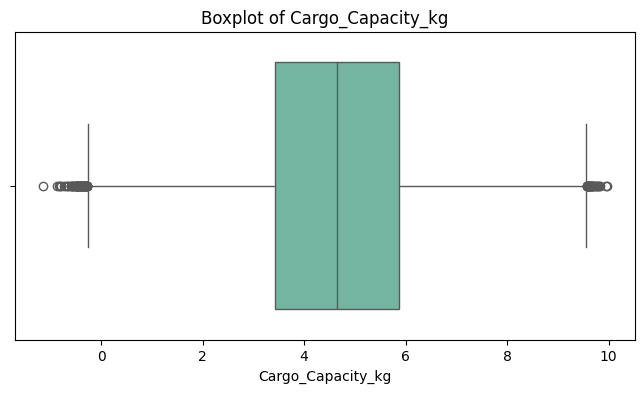

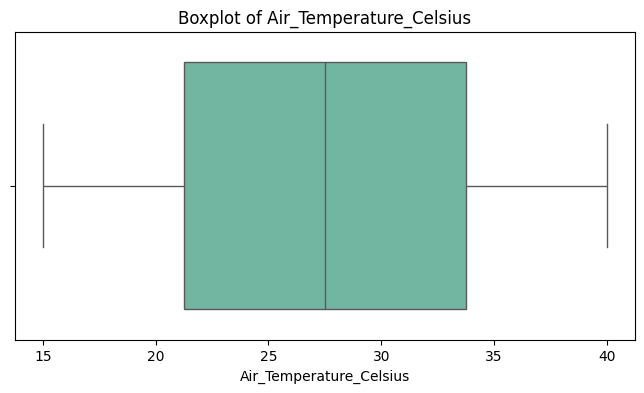

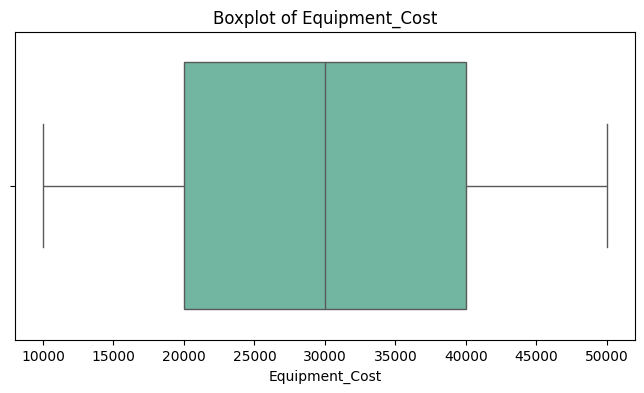

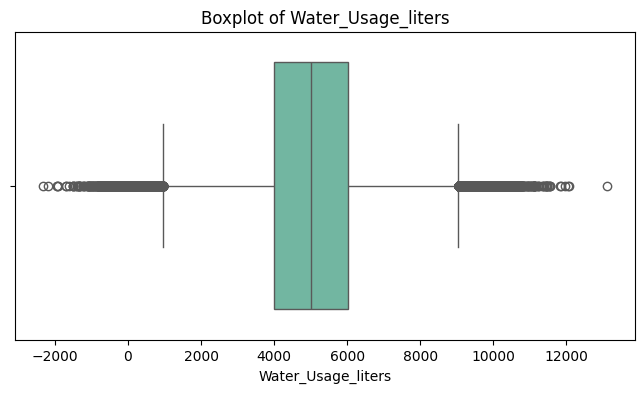

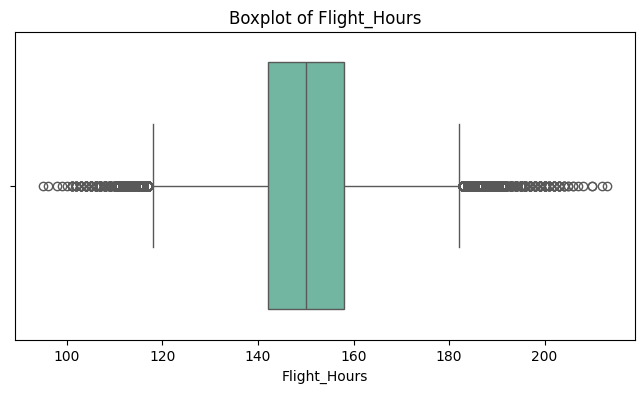

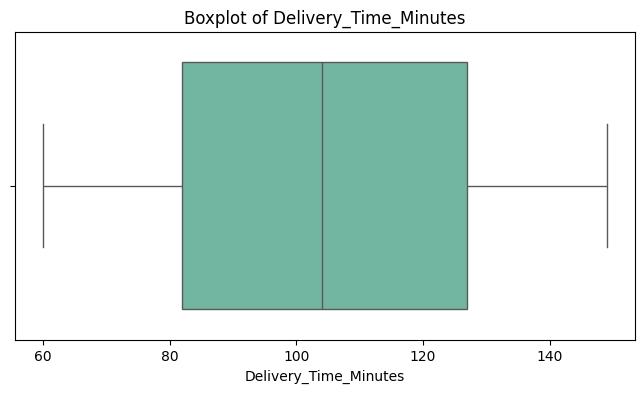

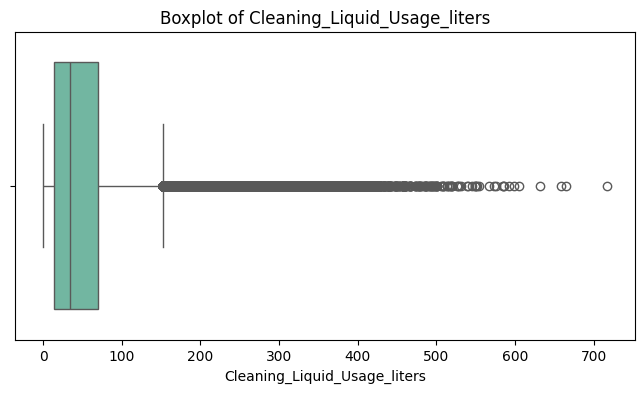

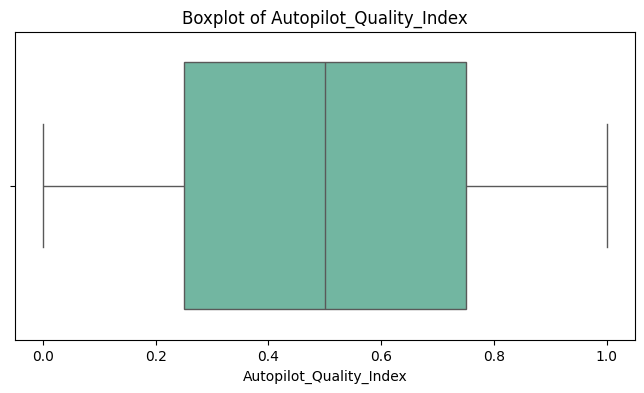

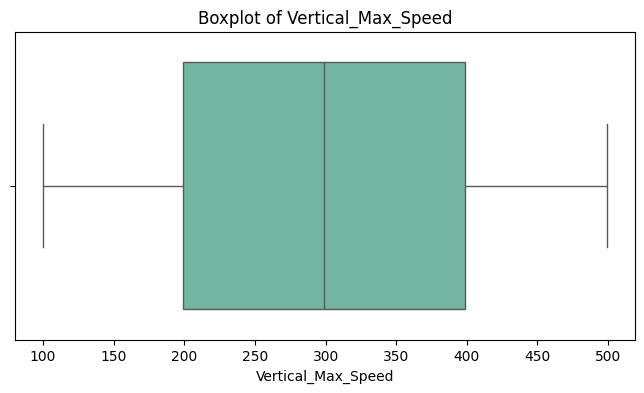

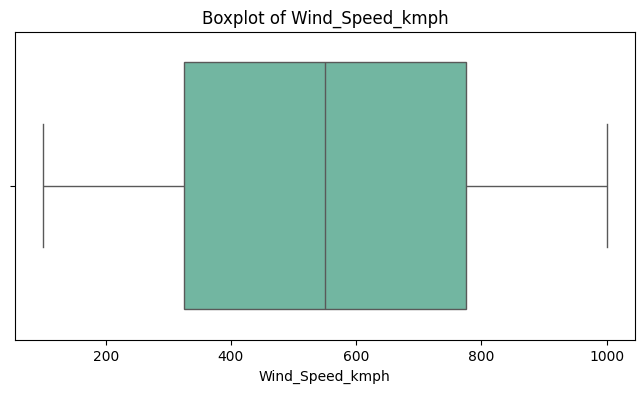

In [120]:
#numerical feautures analysis - identify anomalies
numerical_cols=data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col],palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.show()

The boxplots for numerical features reveal potential outliers in features such a Optimization_Per_Second. These outliers could indicate unusual operational conditions for drones, which might impact model predictions.


#### Correlation Heatmap of Numerical Features
A correlation heatmap we created here is to visualize the relationships between numerical features. It helps identify which features are more strongly correlated with Cargo_Capacity_kg.


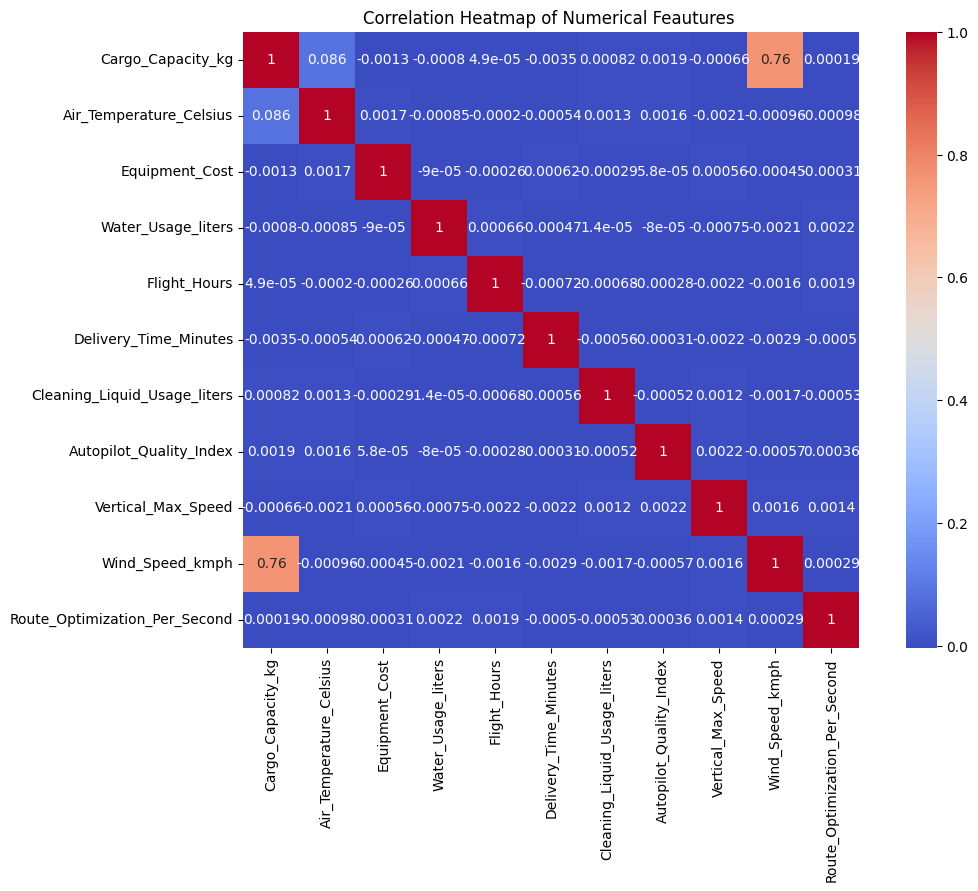

In [105]:
plt.figure(figsize=(12,8))
corr=data.corr(numeric_only=True)
sns.heatmap(corr, annot=True,cmap='coolwarm',square=True)#2f is 2 decimal places
plt.title("Correlation Heatmap of Numerical Feautures ")
plt.show()

### Categorical Feature Analysis
Countplots were used to visualize the distribution of categorical variables. Since many of the counts in each plot were very close, we added exact values on top of each bar to make the differences easier to observe.


/var/folders/4l/50tcn6q1747_2tlxn317zbxr0000gn/T/ipykernel_24010/436836742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set3")


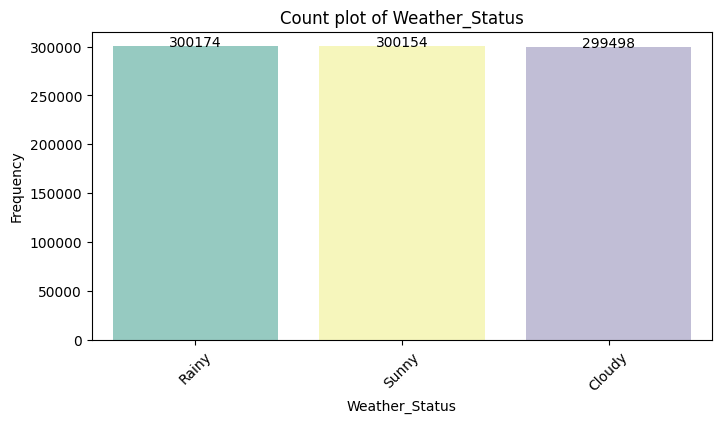

/var/folders/4l/50tcn6q1747_2tlxn317zbxr0000gn/T/ipykernel_24010/436836742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set3")


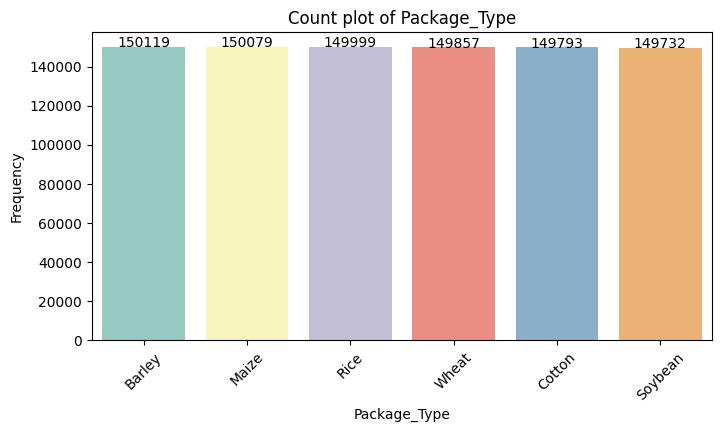

/var/folders/4l/50tcn6q1747_2tlxn317zbxr0000gn/T/ipykernel_24010/436836742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set3")


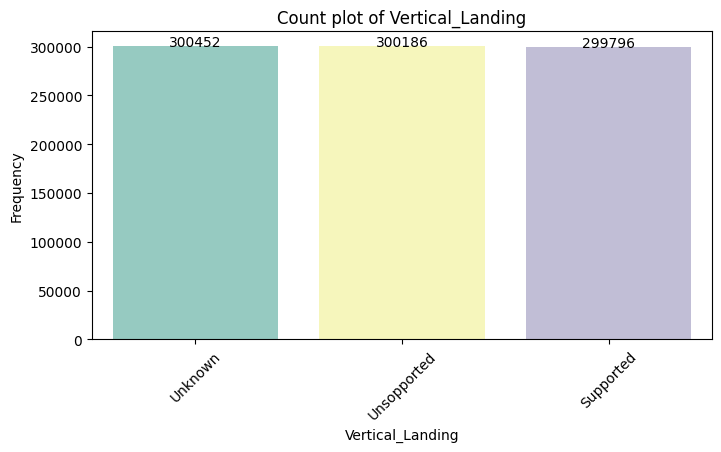

/var/folders/4l/50tcn6q1747_2tlxn317zbxr0000gn/T/ipykernel_24010/436836742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set3")


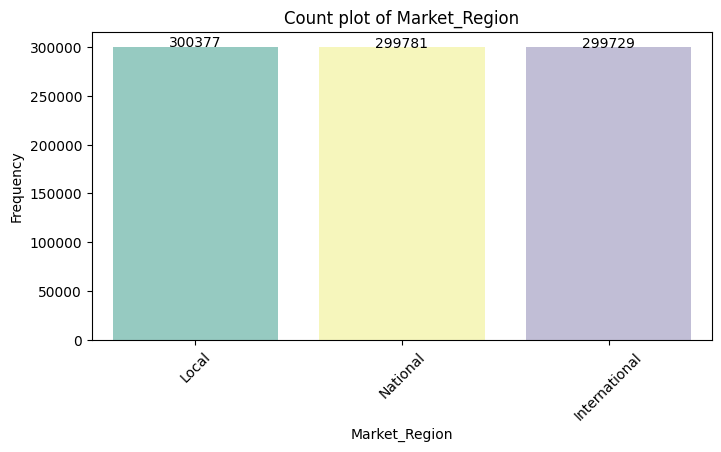

/var/folders/4l/50tcn6q1747_2tlxn317zbxr0000gn/T/ipykernel_24010/436836742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set3")


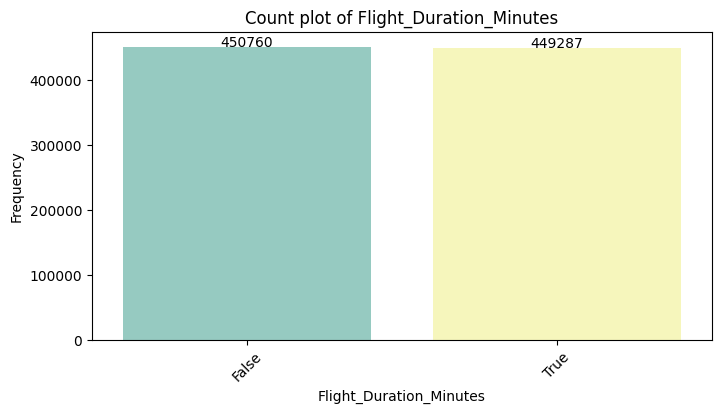

/var/folders/4l/50tcn6q1747_2tlxn317zbxr0000gn/T/ipykernel_24010/436836742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set3")


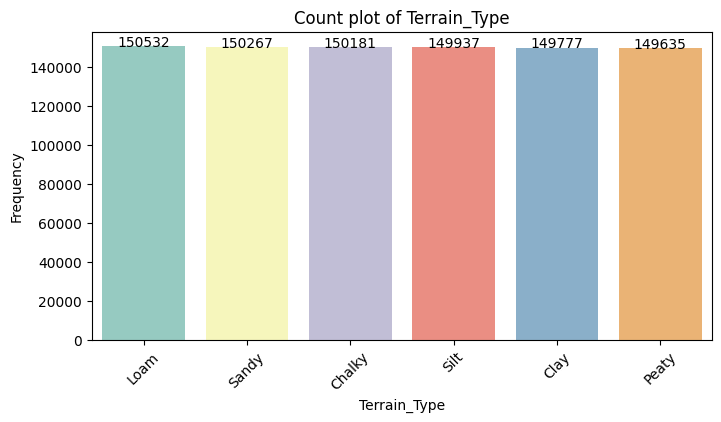

/var/folders/4l/50tcn6q1747_2tlxn317zbxr0000gn/T/ipykernel_24010/436836742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set3")


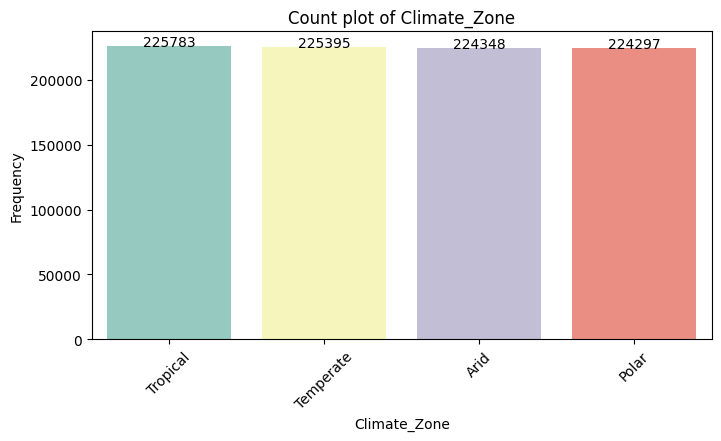

/var/folders/4l/50tcn6q1747_2tlxn317zbxr0000gn/T/ipykernel_24010/436836742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set3")


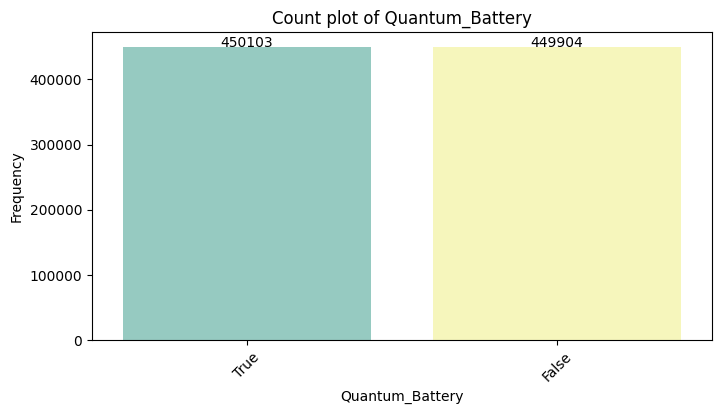

/var/folders/4l/50tcn6q1747_2tlxn317zbxr0000gn/T/ipykernel_24010/436836742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set3")


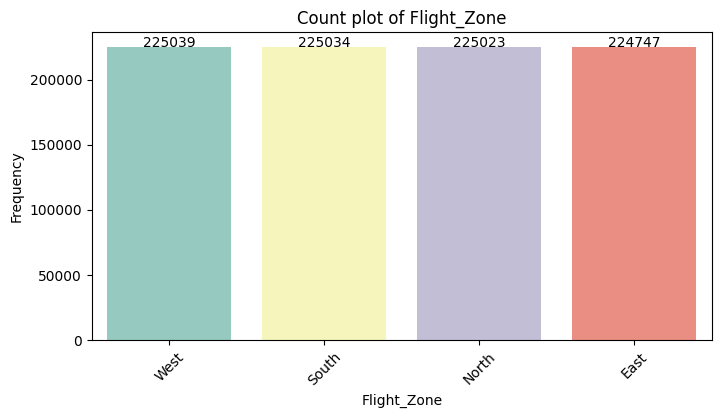

In [104]:
# Categorical Values Analysis - CountPlot with Value Labels
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=data[col], order=data[col].value_counts().index, palette="Set3")
    plt.title(f"Count plot of {col}")
    plt.xlabel(col)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.ylabel("Frequency")

    # Add the exact count on top of each bar
    for p in ax.patches:
        plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 1,  # Slightly above the bar
                 f'{int(p.get_height())}', ha='center', fontsize=10, color='black')

    plt.show()



For example, the countplot for the Flight_Zone variable shows that all categories (West, South, North, and East) have very similar frequencies, with slight differences. This indicates a balanced distribution of flight zones, which ensures the model has sufficient data for each category during training.



# Data Preprocessing 
Handles missing values, encodes categorical feautures, standardizes numerical feautures. does everything to prepare data for machine learning

We loaded the dataset, filled missing values in Cargo_Capacity_kg with the mean, and selected a 1% random sample for faster processing. Features (`X`) and the target variable (`y`) were then separated for model training.


In [107]:
#data preparation and preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split #randomized splitting
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


data = pd.read_csv('/Users/dongziyi/Desktop/aeropolis.csv')
data['Cargo_Capacity_kg'] = data['Cargo_Capacity_kg'].fillna(data['Cargo_Capacity_kg'].mean())#target val mis values 
data= data.sample(frac=0.01, random_state=42) #1% of the dataset
data.fillna(data.mean(numeric_only=True),inplace=True)
X = data.drop(columns=['Cargo_Capacity_kg'])#we're just removing our target value from there
y = data['Cargo_Capacity_kg'] #identifying target value here


We handled missing values for numerical features by filling them with the mean and standardizing the data. For categorical features, missing values were filled with the most frequent value, and the features were one-hot encoded. After preprocessing, we checked to make sure all missing values were handled and the data looked correct.



In [109]:
#preprocessing 
#separating numerical and categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

#then, we are telling each column how to deal with problems, like missing values
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),#fill out with mean
    ('scaler', StandardScaler())#just for scaling
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),#will out with mode value
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))#categorical into binary numbers, so machine could read it
])

preprocessor=ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
# Check if missing values are handled
print("Missing values after preprocessing:")
print(data.isnull().sum())

# Check encoded categorical columns
print("Categorical columns after preprocessing:")
print(categorical_cols)

# Display the first few rows of the processed training data (as a check)
print("Preview of preprocessed training data:")
print(X_train.head())


Missing values after preprocessing:
Cargo_Capacity_kg                   0
Air_Temperature_Celsius             0
Weather_Status                    971
Package_Type                     1015
Vertical_Landing                 1044
Equipment_Cost                      0
Market_Region                     976
Flight_Duration_Minutes          1023
Terrain_Type                      985
Water_Usage_liters                  0
Flight_Hours                        0
Delivery_Time_Minutes               0
Cleaning_Liquid_Usage_liters        0
Climate_Zone                      965
Quantum_Battery                   947
Flight_Zone                       977
Autopilot_Quality_Index             0
Vertical_Max_Speed                  0
Wind_Speed_kmph                     0
Route_Optimization_Per_Second       0
dtype: int64
Categorical columns after preprocessing:
Index(['Weather_Status', 'Package_Type', 'Vertical_Landing', 'Market_Region',
       'Flight_Duration_Minutes', 'Terrain_Type', 'Climate_Zone',
      

# Data Splitting

The dataset was split into training, validation, and test sets (70%, 15%, 15%) to train the models.


In [108]:
#splitting into sets
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.3, random_state=42)#training and temporary sets(30%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)#50% to test set, and other for validation
#training - 70%, validation  15%, test - 15%
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (7000, 19)
Validation set size: (1500, 19)
Test set size: (1500, 19)


# Model Training and Validation

As this is a regression problem, we trained Linear Regression, Random Forest, and Gradient Boosting models. Each model was trained with preprocessing pipelines and evaluated on the validation set using the R² score.


In [110]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}
#model iteration and performance analysis
for name, model in models.items():
    try:
        print(f"Processing model: {name}")
        model_pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        model_pipeline.fit(X_train, y_train)
        val_score = model_pipeline.score(X_val, y_val)
        print (f"{name} Validation Score: {val_score:.2f}")
    except Exception as e:
        print(f"Error with {name}: {e}")


Processing model: Linear Regression
Linear Regression Validation Score: 0.74
Processing model: Random Forest
Random Forest Validation Score: 0.73
Processing model: Gradient Boosting
Gradient Boosting Validation Score: 0.74


# Hyperparameter Tuning

We performed hyperparameter tuning for Random Forest and Gradient Boosting models using GridSearchCV to identify the best parameter combinations. The tuning process used 2-fold cross-validation and R² as the scoring metric. For Linear Regression, which has no tunable parameters, we directly trained and evaluated the model. The best-performing models were stored for further analysis.


In [111]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

param_grids = {
    "Linear Regression": {},
    "Random Forest": {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    "Gradient Boosting": {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 5, 10],
        'model__min_samples_split': [3, 5, 10],
        'model__learning_rate': [0.01, 0.1, 0.3]
    }
}

# Tuning models
best_models = {}
for name, model in models.items():
    print(f"Tuning model: {name}")
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    if param_grids[name]:
        grid_search = GridSearchCV(
            estimator=model_pipeline,
            param_grid=param_grids[name],
            cv=2,  # 2-fold cross-validation
            scoring='r2',
            verbose=2,
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best Validation score: {grid_search.best_score_:.2f}")
    else:
        # In case if Linear Regression doesn't need tuning
        model_pipeline.fit(X_train, y_train)
        best_models[name] = model_pipeline
        print(f"{name} Validation Score: {model_pipeline.score(X_val, y_val):.2f}")


Tuning model: Linear Regression
Linear Regression Validation Score: 0.74
Tuning model: Random Forest
Fitting 2 folds for each of 81 candidates, totalling 162 fits
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50; total time=   1.9s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=50; total time=   2.1s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   2.3s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=50; total time=   2.3s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   5.3s
[CV] END model__max_depth=None, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   5.7s
[CV] END model__max_depth=None, model__min_samples_leaf

Here, we created a countplot to compare the validation scores of models 

/var/folders/4l/50tcn6q1747_2tlxn317zbxr0000gn/T/ipykernel_24010/734874288.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=scores, palette="viridis")


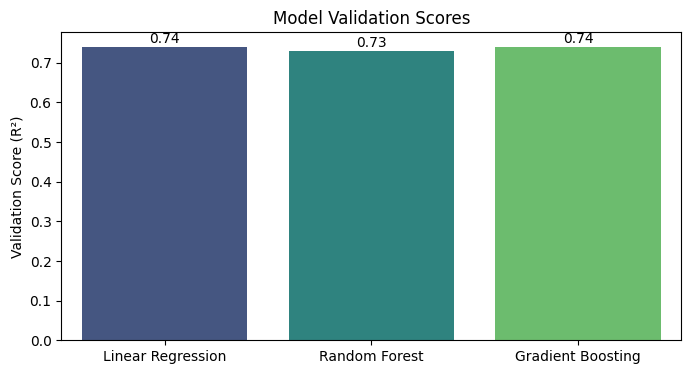

In [112]:
import matplotlib.pyplot as plt  
import seaborn as sns  

model_names = ["Linear Regression", "Random Forest", "Gradient Boosting"]
scores = [0.74, 0.73, 0.74]

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=model_names, y=scores, palette="viridis")
plt.title("Model Validation Scores")
plt.ylabel("Validation Score (R²)")

# Add the exact values on top of each bar
for p in ax.patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.01,  # Slightly above the bar
             f'{p.get_height():.2f}', ha='center', fontsize=10, color='black')

plt.show()


# Test Set Evaluation

We tested the best model, Linear Regression, on the test set to see how well it performs on new data. The evaluation metrics used were:
- **R² Score:** This shows how well the model explains the variability in the target. 
- **RMSE (Root Mean Squared Error):** This tells us the average prediction error. 


In [113]:
# Evaluate models on the test set
results = []
for name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    results.append({"Model": name, "R²": round(r2, 2), "RMSE": round(rmse, 2)})

# Display results in a DataFrame
results_df = pd.DataFrame(results)
print("Test Set Performance for All Models:")
print(results_df)

# Final evaluation of the best-performing model
best_model_name = results_df.loc[results_df['R²'].idxmax(), 'Model']
best_model = best_models[best_model_name]
y_pred = best_model.predict(X_test)
final_r2 = r2_score(y_test, y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Final Test Set Evaluation for Best Model ({best_model_name}):")
print(f"R² Score: {final_r2:.2f}")
print(f"RMSE: {final_rmse:.2f}")

Test Set Performance for All Models:
               Model    R²  RMSE
0  Linear Regression  0.70  0.88
1      Random Forest  0.69  0.89
2  Gradient Boosting  0.69  0.88
Final Test Set Evaluation for Best Model (Linear Regression):
R² Score: 0.70
RMSE: 0.88


We analyzed the Linear Regression model's coefficients to understand feature impact. Positive coefficients show a direct relationship, while negative ones indicate an inverse relationship.


/var/folders/4l/50tcn6q1747_2tlxn317zbxr0000gn/T/ipykernel_24010/3106809336.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette="viridis")


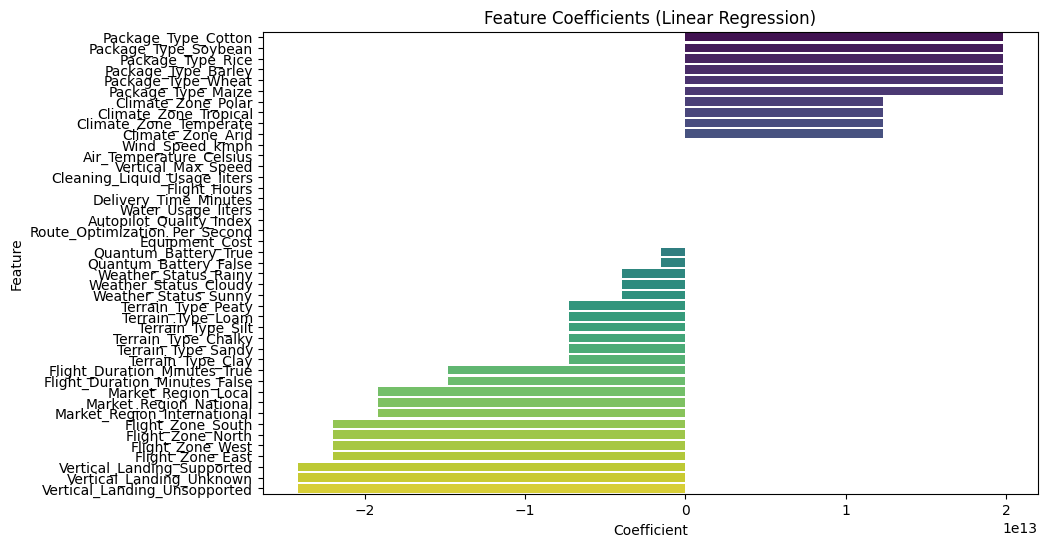

In [118]:
# Function to extract feature names after preprocessing
def get_feature_names(column_transformer):
    output_features = []
    for name, transformer, columns in column_transformer.transformers_:
        if transformer == 'drop' or transformer is None:
            continue
        if hasattr(transformer, 'get_feature_names_out'):
            output_features.extend(transformer.get_feature_names_out(columns))
        else:
            output_features.extend(columns)
    return output_features

# Extract feature names from the preprocessor
processed_features = get_feature_names(preprocessor)

# Feature importance for Linear Regression
if "Linear Regression" in best_models:
    coefficients = best_models['Linear Regression'].named_steps['model'].coef_
    importance_df = pd.DataFrame({
        'Feature': processed_features,  # Use processed feature names
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)

    # Plot the feature coefficients
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette="viridis")
    plt.title("Feature Coefficients (Linear Regression)")
    plt.xlabel("Coefficient")
    plt.ylabel("Feature")
    plt.show()



# Results Visualization

We also created a scatter plot to compare the true and predicted values of Cargo_Capacity_kg. The red dashed line represents perfect predictions, making it easy to see how accurate the model is.


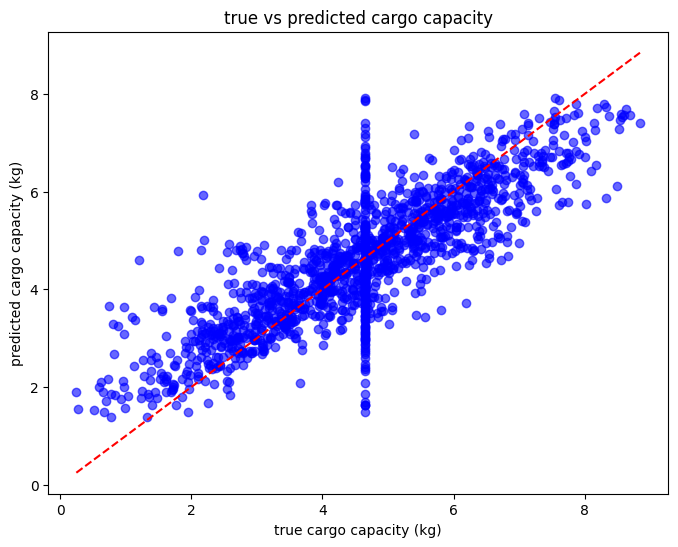

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("true vs predicted cargo capacity")
plt.xlabel("true cargo capacity (kg)")
plt.ylabel("predicted cargo capacity (kg)")
plt.show()